# CNN model for Fruit Image Classification

In this project, a CNN from scratch for multi-class classification is built for the fruits dataset from Kaggle.
The dataset consists of 90380 images with 67692 training and 22688 testing images. The size of the given image is 100 * 100, with 131 classes of fruits.

In [10]:
from sklearn.datasets import load_files
import numpy as np

Loading training and testing datasets from the OS to the notebook using Scikit-learn load_files

In [121]:
train_directory='/Users/swami/Downloads/New folder (4)/5857_1166105_bundle_archive/fruits-360/Training'
test_directory='/Users/swami/Downloads/New folder (4)/5857_1166105_bundle_archive/fruits-360/Test'

In [122]:
def load_dataset(file_path):
    data = load_files(file_path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

In [123]:
x_train, y_train,target_labels = load_dataset(train_directory)
x_test, y_test,_ = load_dataset(test_directory)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Loading complete!
Training set size :  67692
Testing set size :  22688


In [124]:
num_classes = len(np.unique(y_train))
num_classes

131

Target labels are numbers corresponding to class label. We need to change them to a vector of 131 elements.

In [15]:
print(y_train[0:15])


[ 27  73  68 114 117  80  72   2  90 130  62  22 121  31 127]


In [16]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Dividing validation set into test and validation set

In [17]:
x_test,x_valid = x_test[5000:],x_test[:5000]
y_test,y_vaild = y_test[5000:],y_test[:5000]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (5000,)
Vaildation y : (5000, 131)
Test X :  (17688,)
Test y :  (17688, 131)


As the training data is just the file names of the images, converting them to pixel matrix for convenience

In [15]:
x_train[0]


'/Users/swami/Downloads/New folder (4)/5857_1166105_bundle_archive/fruits-360/Training\\Cherry 2\\r_263_100.jpg'

In [18]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_img_to_array(files):
    img_array=[]
    for file in files:
        # Convert to Numpy Array
        img_array.append(img_to_array(load_img(file)))
    return img_array

x_train = np.array(convert_img_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_img_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_img_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (67692, 100, 100, 3)
Validation set shape :  (5000, 100, 100, 3)
Test set shape :  (17688, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [19]:
print('1st training image as array',x_train[0])

1st training image as array [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


Rescaling the dataset so the pixel lies in the range of 0 and 1

In [ ]:
x_train = x_train/255
x_valid = x_valid/255
x_test = x_test/255
x_train[0]

Visualizing the training set

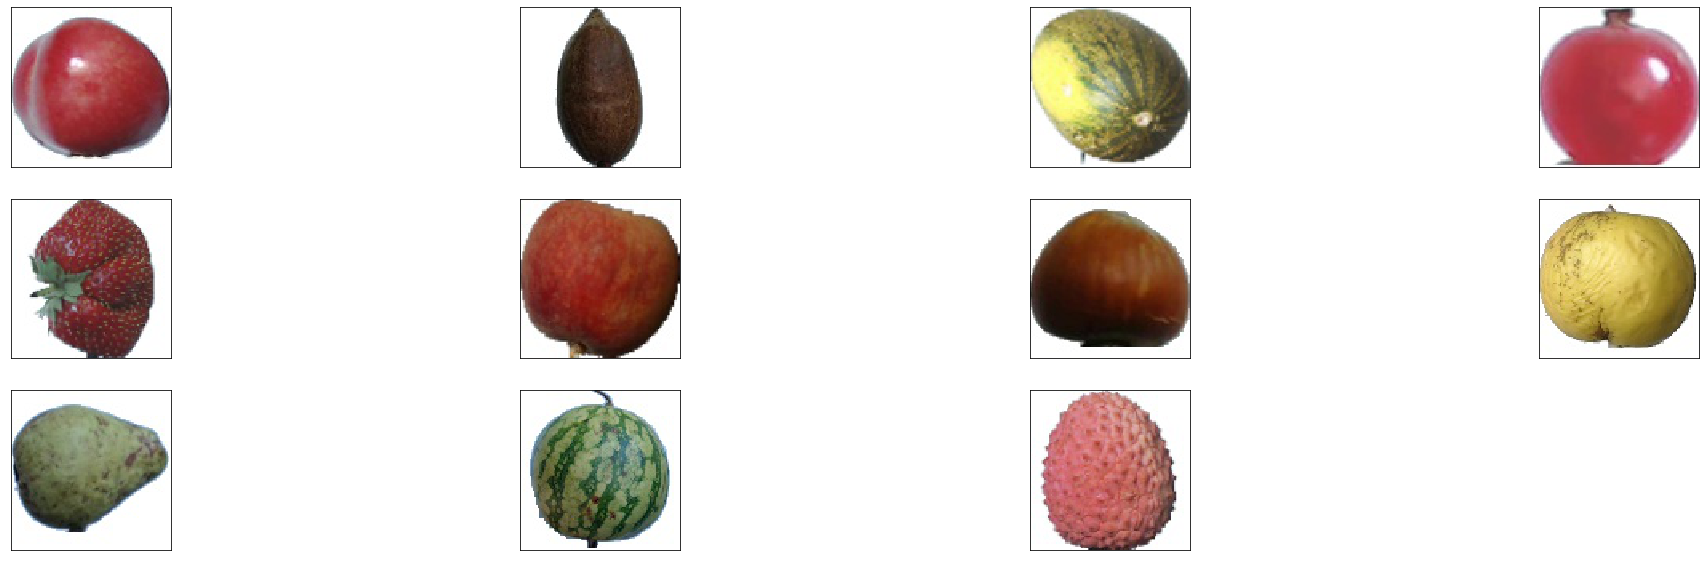

In [87]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(35,10))
for i in range(11):
    ax= fig.add_subplot(3,4,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

**Building the CNN model using four Conv2D layers, followed by maxpooling layers.
Using flatter, dense and dropout layers to increase the accuracy of the model**

In [69]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.layers import Conv2D,MaxPooling2D
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(131, activation='sigmoid'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 8, 8, 128)       

In [70]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])

**Fitting the model to our datasets (training and validation)**

In [72]:
from keras.callbacks import ModelCheckpoint
from keras import backend as K
checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)

history = model.fit(x_train,y_train,
        batch_size = 30,
        epochs=5,
        validation_data=(x_valid, y_vaild),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Train on 67692 samples, validate on 5000 samples
Epoch 1/5
 - 2591s - loss: 0.0084 - acc: 0.9970 - val_loss: 0.0103 - val_acc: 0.9968

Epoch 00001: val_loss improved from inf to 0.01029, saving model to cnn_from_scratch_fruits.hdf5
Epoch 2/5
 - 2994s - loss: 0.0069 - acc: 0.9975 - val_loss: 0.0093 - val_acc: 0.9970

Epoch 00002: val_loss improved from 0.01029 to 0.00926, saving model to cnn_from_scratch_fruits.hdf5
Epoch 3/5
 - 3015s - loss: 0.0058 - acc: 0.9979 - val_loss: 0.0089 - val_acc: 0.9970

Epoch 00003: val_loss improved from 0.00926 to 0.00890, saving model to cnn_from_scratch_fruits.hdf5
Epoch 4/5
 - 2884s - loss: 0.0050 - acc: 0.9982 - val_loss: 0.0079 - val_acc: 0.9974

Epoch 00004: val_loss improved from 0.00890 to 0.00792, saving model to cnn_from_scratch_fruits.hdf5
Epoch 5/5
 - 2212s - loss: 0.0042 - acc: 0.9985 - val_loss: 0.0074 - val_acc: 0.9975

Epoch 00005: val_loss improved from 0.00792 to 0.00744, saving model to cnn_from_scratch_fruits.hdf5


In [73]:
model.load_weights('cnn_from_scratch_fruits.hdf5')

In [75]:
model_accuracy= model.evaluate(x_test,y_test,verbose=0)
print('test accuracy: ',model_accuracy[1])

test accuracy:  0.9975932836532593


As we can see the model is a success with an accuracy of 99.7% and loss of 0.42% 

**Using the trained model to predict the labels**

In [85]:
y_pred= model.predict(x_test)


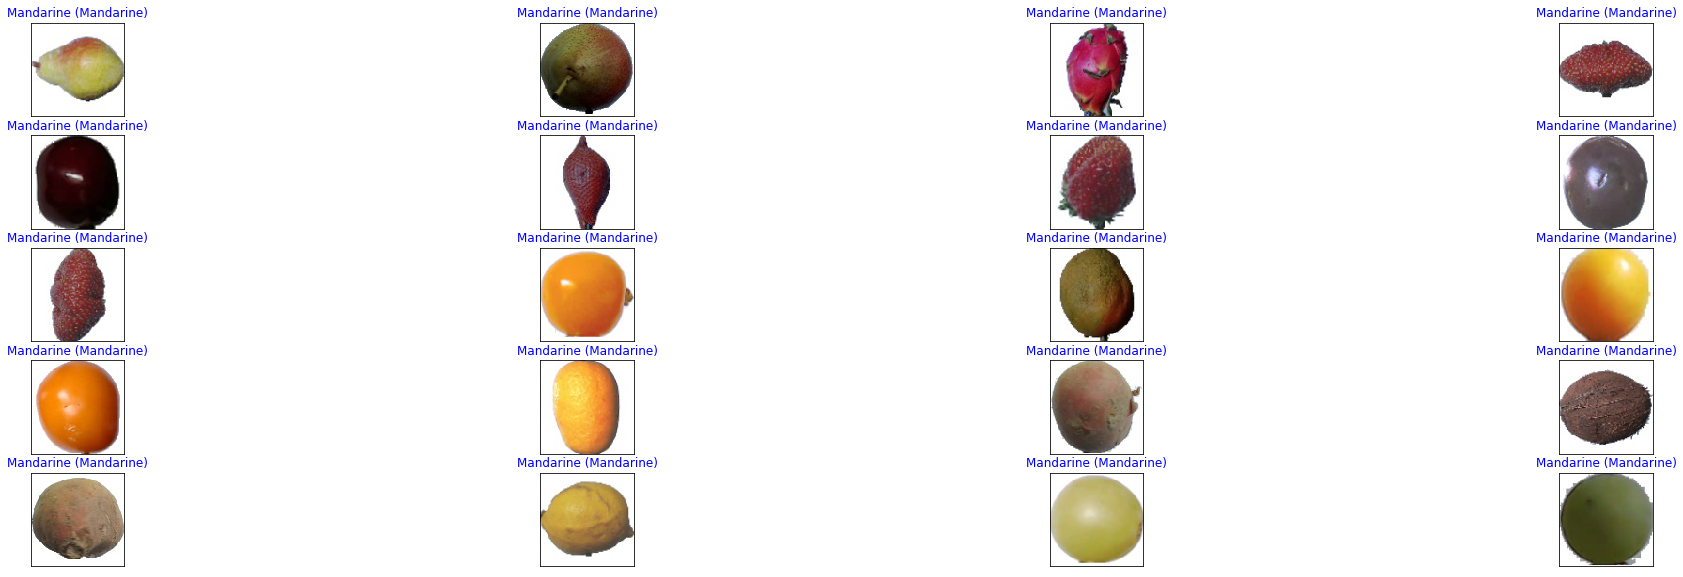

In [94]:
fig= plt.figure(figsize=(35,10))
for i,idx in enumerate(np.random.choice(x_test.shape[1], size=20, replace=False)):
    ax1 = fig.add_subplot(5, 4, i + 1, xticks=[], yticks=[])
    ax1.imshow(np.squeeze(x_test[idx]))
    pred_id = np.argmax(y_pred[idx])
    true_id = np.argmax(y_test[idx])
    ax1.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))


As we can see that the model predicted every fruit with correct label

**Visualizing the accuracy and loss of the model on train and test sets**

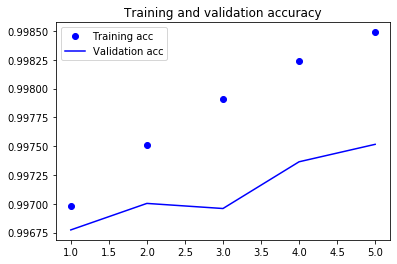

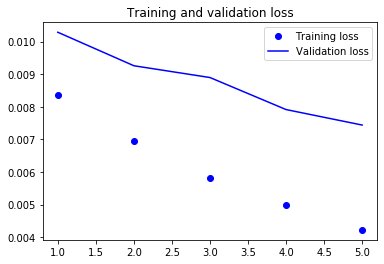

In [97]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Visualizing what Convnet Learns using heatmap**

Visualizing intermediate activations consists of displaying the feature maps that are
output by various convolution and pooling layers in a network, given a certain input.This gives a view into how an input is decomposed into the different filters
learned by the network.

Sampling on one image to visualize 

In [102]:
img_path = '/Users/swami/Downloads/New folder (4)/5857_1166105_bundle_archive/fruits-360/Training/Apple Braeburn/21_100.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(100, 100))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 100, 100, 3)


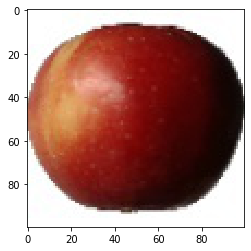

In [105]:
plt.imshow(img_tensor[0])
plt.show()


 Instantiating a model from an input tensor and a list of output tensors

In [103]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

 Visualizing every channel in every intermediate activation

C:\Users\swami\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


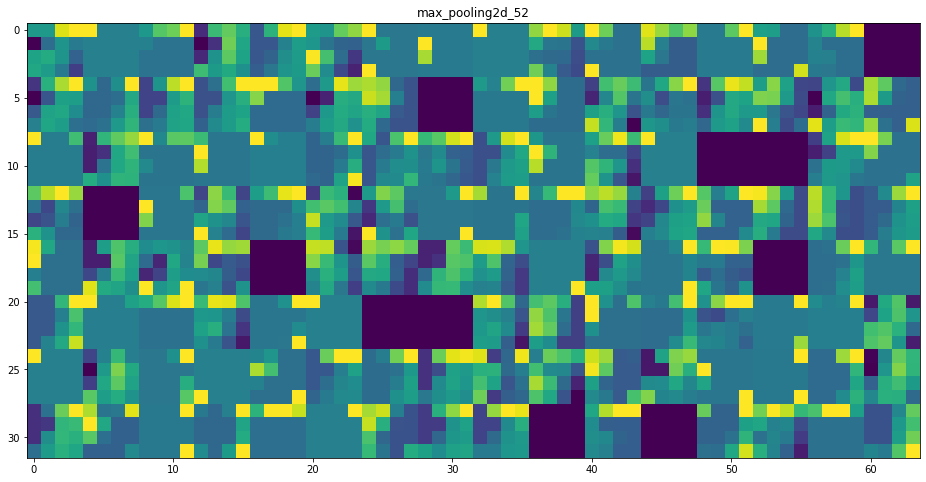

In [104]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    images_per_row = 16
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],
scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

**Visualizing convnet filters**

Defining the loss tensor for filter visualization

In [107]:
from keras.applications import VGG16
from keras import backend as K
model = VGG16(weights='imagenet',
include_top=False)
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

Obtaining the gradient of the loss with regard to the input

In [108]:
grads = K.gradients(loss, model.input)[0]

Gradient-normalization

In [109]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)


Fetching Numpy output values given Numpy input values

In [110]:
iterate = K.function([model.input], [loss, grads])
loss_value, grads_value = iterate([np.zeros((1, 100, 100, 3))])

 Loss maximization via stochastic gradient descent

In [111]:
input_img_data = np.random.random((1, 100, 100, 3)) * 20 + 128.
step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

Utility function to convert a tensor into a valid image

In [112]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

 Function to generate filter visualizations

In [113]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)

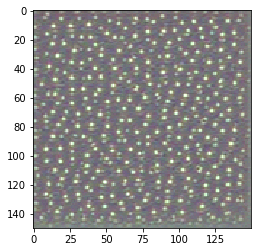

In [114]:
plt.imshow(generate_pattern('block3_conv1', 0))